# Image Data Collection and Processing
This notebook loads, augments, and extracts features from group member images.

In [48]:
# Install required libraries
!pip install pillow opencv-python numpy pandas matplotlib

In [49]:
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [50]:
# Define members and expressions
members = ['david', 'nicolle', 'chance', 'annabelle', 'tamanda']
expressions = ['neutral', 'smile', 'suprised']
base_path = '../images'

# Helper function to load images
def load_images(members, expression):
    path = os.path.join(base_path, member, f'{expression}.jpg')
    # Resize every image to 224x224
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    return Image.open(path)

david - neutral: size = (224, 224)
david - smile: size = (224, 224)
david - suprised: size = (224, 224)
nicolle - neutral: size = (224, 224)
nicolle - smile: size = (224, 224)
nicolle - suprised: size = (224, 224)
chance - neutral: size = (224, 224)
chance - smile: size = (224, 224)
chance - suprised: size = (224, 224)
annabelle - neutral: size = (224, 224)
annabelle - smile: size = (224, 224)
annabelle - suprised: size = (224, 224)
tamanda - neutral: size = (224, 224)
tamanda - smile: size = (224, 224)
tamanda - suprised: size = (224, 224)


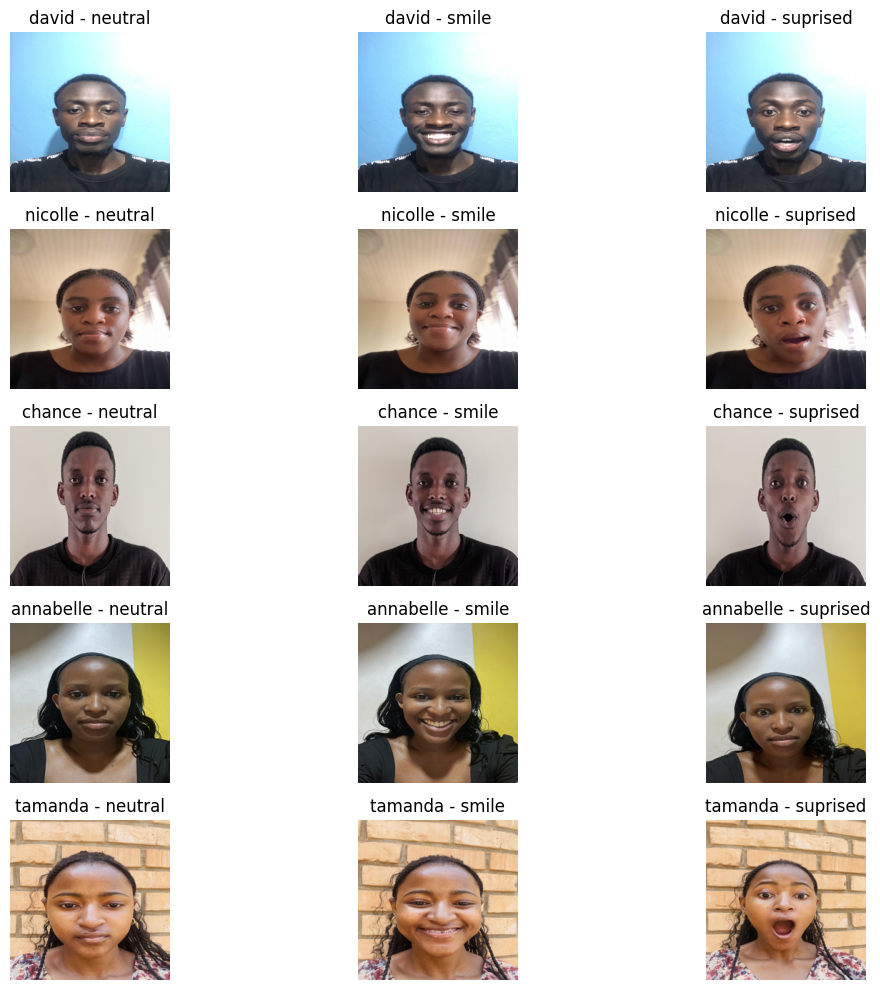

In [51]:
# Display sample image
fig, axs = plt.subplots(len(members), len(expressions), figsize=(12, 10))
for i, member in enumerate(members):
    for j, expression in enumerate(expressions):
        img = load_images(member, expression)
        # Resize every image to 224x224
        img = img.resize((224, 224))
        print(f"{member} - {expression}: size = {img.size}")  # For PIL Image
        axs[i, j].imshow(img)
        axs[i, j].set_title(f'{member} - {expression}')
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

In [52]:
# Augmentation functions and save augmented images into folder ../augmented
def augment_image(img):
    img_cv = np.array(img)
    rotated = cv2.rotate(img_cv, cv2.ROTATE_90_CLOCKWISE)
    flipped = cv2.flip(img_cv, 1)
    gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
    # Save augmented images
    cv2.imwrite(f'../augmented/{member}_{expression}_rotated.jpg', rotated)
    print(f'../augmented/{member}_{expression}_rotated.jpg')
    cv2.imwrite(f'../augmented/{member}_{expression}_flipped.jpg', flipped)
    print(f'../augmented/{member}_{expression}_flipped.jpg')
    cv2.imwrite(f'../augmented/{member}_{expression}_grayscale.jpg', gray)
    print(f'../augmented/{member}_{expression}_grayscale.jpg')
    return [img_cv, rotated, flipped, gray]

In [53]:
# Extract features (color histogram for RGB, grayscale histogram for gray)
def extract_features(img_arr):
    if len(img_arr.shape) == 2:  # grayscale
        hist = cv2.calcHist([img_arr], [0], None, [32], [0, 256]).flatten()
    else:
        chans = cv2.split(img_arr)
        hist = np.concatenate([
            cv2.calcHist([c], [0], None, [32], [0, 256]).flatten() for c in chans
        ])
    return hist / np.sum(hist)  # normalize

In [54]:
# Process all images, augment, extract features, and save
rows = []
os.makedirs('../augmented_images', exist_ok=True)
for member in members:
    for expression in expressions:
        try:
            img = load_image(member, expression)
        except FileNotFoundError as e:
            print(f"Missing: {member} - {expression}")
            continue
        aug_imgs = augment_image(img)
        aug_types = ['original', 'rotated', 'flipped', 'grayscale']
        for aug_type, aug_img in zip(aug_types, aug_imgs):
            features = extract_features(aug_img)
            row = {
                'member': member,
                'expression': expression,
                'augmentation': aug_type
            }
            for i, val in enumerate(features):
                row[f'feat_{i}'] = val
            rows.append(row)
            aug_img_pil = Image.fromarray(aug_img)
            aug_img_pil.save(f'../augmented_images/{member}_{expression}_{aug_type}.jpg')
            print(f'Saved: ../augmented_images/{member}_{expression}_{aug_type}.jpg')

df = pd.DataFrame(rows)
os.makedirs('../data', exist_ok=True)
df.to_csv('../data/image_features.csv', index=False)
print("Data saved to ../data/image_features.csv ✅")
df.head()

../augmented/david_neutral_rotated.jpg
../augmented/david_neutral_flipped.jpg
../augmented/david_neutral_grayscale.jpg
Saved: ../augmented_images/david_neutral_original.jpg
Saved: ../augmented_images/david_neutral_rotated.jpg
Saved: ../augmented_images/david_neutral_flipped.jpg
Saved: ../augmented_images/david_neutral_grayscale.jpg
../augmented/david_smile_rotated.jpg
../augmented/david_smile_flipped.jpg
../augmented/david_smile_grayscale.jpg
Saved: ../augmented_images/david_smile_original.jpg
Saved: ../augmented_images/david_smile_rotated.jpg
Saved: ../augmented_images/david_smile_flipped.jpg
Saved: ../augmented_images/david_smile_grayscale.jpg
../augmented/david_suprised_rotated.jpg
../augmented/david_suprised_flipped.jpg
../augmented/david_suprised_grayscale.jpg
Saved: ../augmented_images/david_suprised_original.jpg
Saved: ../augmented_images/david_suprised_rotated.jpg
Saved: ../augmented_images/david_suprised_flipped.jpg
Saved: ../augmented_images/david_suprised_grayscale.jpg
../au

,member,expression,augmentation,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,david,neutral,original,3.908344e-06,0.000261,0.001713,0.003812,0.015205,0.027483,0.018210,...,0.001355,0.001092,0.000992,0.000874,0.000737,0.000729,0.001071,0.003056,0.007471,0.180818
1,david,neutral,rotated,3.908344e-06,0.000261,0.001713,0.003812,0.015205,0.027483,0.018210,...,0.001355,0.001092,0.000992,0.000874,0.000737,0.000729,0.001071,0.003056,0.007471,0.180818
2,david,neutral,flipped,3.908344e-06,0.000261,0.001713,0.003812,0.015205,0.027483,0.018210,...,0.001355,0.001092,0.000992,0.000874,0.000737,0.000729,0.001071,0.003056,0.007471,0.180818
3,david,neutral,grayscale,1.395837e-07,0.000083,0.002578,0.008346,0.024398,0.074433,0.068416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,david,smile,original,4.299178e-05,0.000831,0.002449,0.008304,0.027262,0.021193,0.010250,...,0.001102,0.001067,0.000954,0.000813,0.000981,0.001821,0.004935,0.008417,0.014734,0.165581


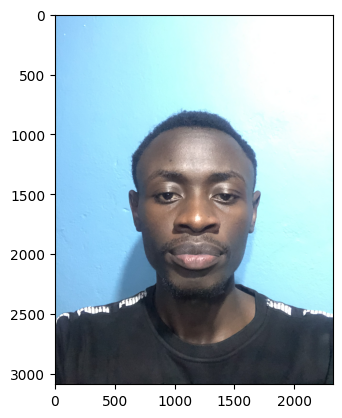

Example extracted features for one image:
feat_0: 3.9083438423404004e-06
feat_1: 0.0002612541720736772
feat_2: 0.001712692086584866
feat_3: 0.0038118914235383272
feat_4: 0.01520545780658722
feat_5: 0.02748282253742218
feat_6: 0.018210090696811676
feat_7: 0.008425598032772541
feat_8: 0.005219267215579748
feat_9: 0.004828851670026779
feat_10: 0.006714767310768366
feat_11: 0.004784836433827877
feat_12: 0.004375111777335405
feat_13: 0.0043610138818621635
feat_14: 0.004564433824270964
feat_15: 0.004578159656375647
feat_16: 0.008151083253324032
feat_17: 0.022181013599038124
feat_18: 0.02330080047249794
feat_19: 0.01630258560180664
feat_20: 0.013391474261879921
feat_21: 0.013371001929044724
feat_22: 0.013720659539103508
feat_23: 0.015142645686864853
feat_24: 0.011066382750868797
feat_25: 0.010414387099444866
feat_26: 0.009282874874770641
feat_27: 0.00756841478869319
feat_28: 0.008451281115412712
feat_29: 0.0076413704082369804
feat_30: 0.006961365230381489
feat_31: 0.03184583783149719
feat_32:

In [55]:
# Print extracted features and their explanation

# Example: print the first row's features
example_row = rows[0]
# Print that image from row[0]
img = load_image(example_row['member'], example_row['expression'])
plt.imshow(img)
plt.show()

print("Example extracted features for one image:")
for k, v in example_row.items():
    if k.startswith('feat_'):
        print(f"{k}: {v}")

print("\nFeature Explanation:")
print("""
- The extracted features are histogram bins from the image data.
- For RGB images, features are concatenated color histograms for each channel (R, G, B).
- For grayscale images, features are histogram bins of pixel intensities.
- Each 'feat_i' represents the normalized count of pixels in a specific intensity range (bin).
- These features serve as a compact embedding of the image, capturing its color or intensity distribution.
- Such embeddings are useful for image comparison, clustering, or as input to machine learning models.
""")